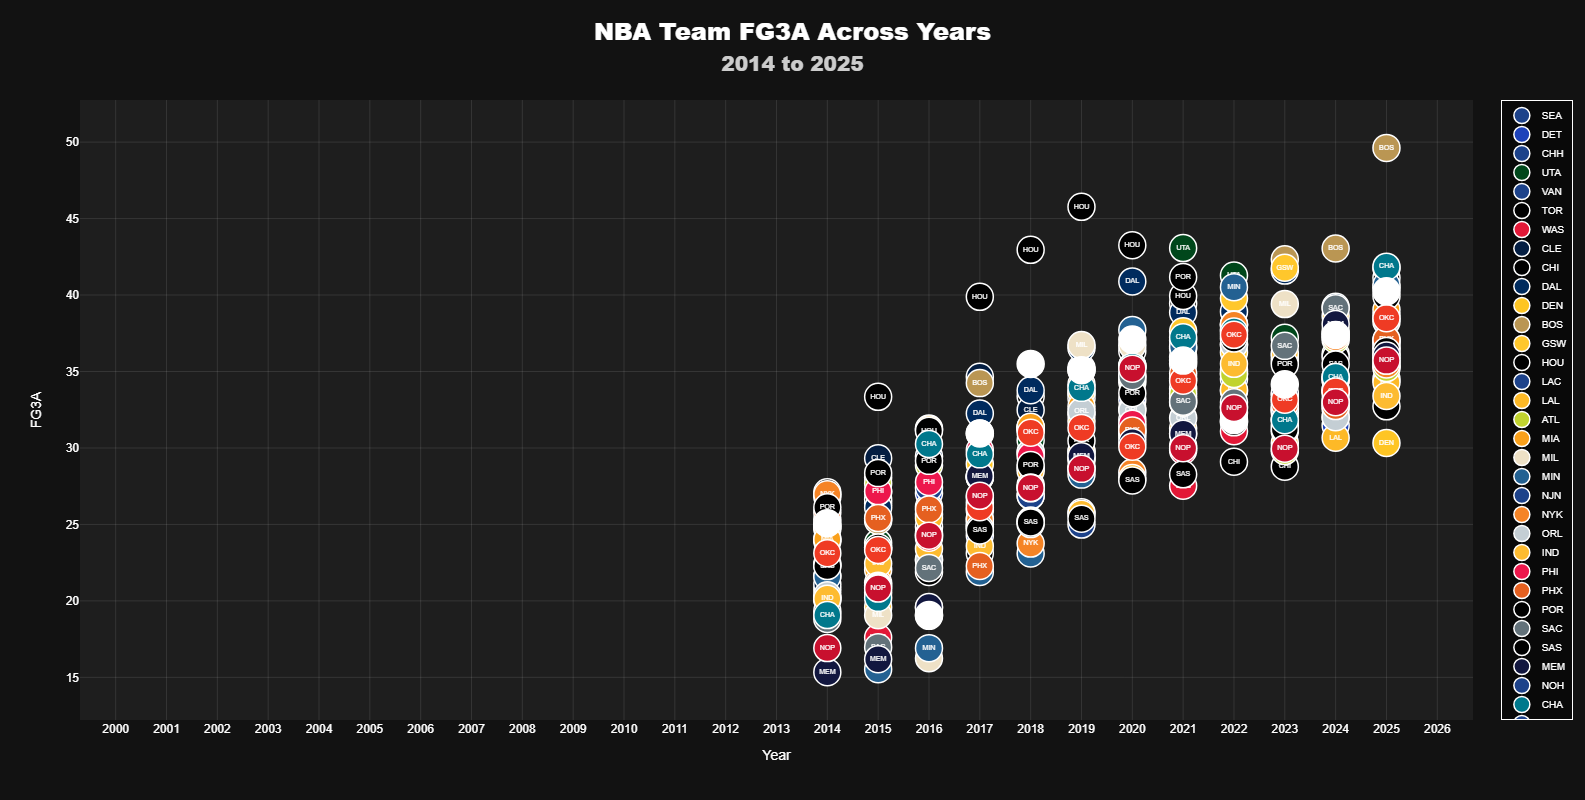

In [27]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

def get_multi_year_data(start_year, end_year):
    """
    Retrieve team performance data across multiple years
    """
    url='https://raw.githubusercontent.com/gabriel1200/player_sheets/refs/heads/master/team_totals/all_teamyears.csv'
    
    df =pd.read_csv(url)
    return df

def create_multi_year_dot_plot(metric_column, start_year=2014, end_year=2025):
    """
    Create a dot plot showing team performance across multiple years
    """
    # NBA team colors dictionary
    team_colors = {
        'ATL': '#C1D32F', 'BOS': '#BA9653', 'BKN': '#FFFFFF', 'CHA': '#00788C',
        'CHI': '#000000', 'CLE': '#041E42', 'DAL': '#002B5E', 'DEN': '#FEC524',
        'DET': '#1D42BA', 'GSW': '#FFC72C', 'HOU': '#000000', 'IND': '#FDBB30',
        'LAC': '#1D428A', 'LAL': '#FDB927', 'MEM': '#12173F', 'MIA': '#F9A01B',
        'MIL': '#EEE1C6', 'MIN': '#236192', 'NOP': '#C8102E', 'NYK': '#F58426',
        'OKC': '#EF3B24', 'ORL': '#C4CED4', 'PHI': '#ED174C', 'PHX': '#E56020',
        'POR': '#000000', 'SAC': '#63727A', 'SAS': '#000000', 'TOR': '#000000',
        'UTA': '#00471B', 'WAS': '#E31837'
    }
    
    # Get data
    df = get_multi_year_data(start_year, end_year)

    ymin=df[metric_column].min()
    ymax= df[metric_column].max()
    df.dropna(subset=metric_column,inplace=True)
    
    # Normalize the metric if it's a percentage or needs per-possession normalization
    if any(keyword in metric_column.lower() for keyword in ['freq', 'accur', 'pct', '%']):
        df[metric_column] = df[metric_column] * 100
    else:
        # Assume per-possession normalization if not a percentage
        df[metric_column] = 100 * df[metric_column] / df['POSS']
    
    # Prepare the data for plotting
    if 'TeamAbbreviation' in df.columns:
        df['Team'] = df['TeamAbbreviation']
    
    # Create the dot plot
    fig = go.Figure()
    
    # Get unique teams
    teams = df['Team'].unique()
    
    for team in teams:
        team_data = df[df['Team'] == team]
        
        # Get team-specific color or default to a neutral color
        color = team_colors.get(team, '#1D428A')
        
        fig.add_trace(go.Scatter(
            x=team_data['year'],
            y=team_data[metric_column],
            mode='markers+text',
            text=team_data['Team'],
            name=team,
            marker=dict(
                color=color,
                size=27,
                line=dict(color='white', width=1.5)
            ),
            textfont=dict(
                size=7  # Adjust the size to your preference
                
            ),
            hovertemplate=(
                f"Team: {team}<br>"
                f"Year: %{{x}}<br>"
                f"{metric_column}: %{{y:.2f}}<extra></extra>"
            )
        ))

    
    # Update layout for a stylish, dark theme visualization
    fig.update_layout(
        title={
            'text': f'NBA Team {metric_column} Across Years<br>'
                    f'<span style="font-size: 20px; color: #CCCCCC">{start_year} to {end_year}</span>',
            'font': {'size': 24, 'color': 'white', 'family': 'Arial Black'},
            'y': 0.95,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        height=800,
        width=1200,
        plot_bgcolor='#1E1E1E',
        paper_bgcolor='#121212',
        font=dict(color='white', family='Arial'),
        xaxis=dict(
            title='Year',
            tickmode='linear',
            tick0=start_year,
            dtick=1,
            gridcolor='rgba(255,255,255,0.1)'
        ),
        yaxis=dict(
            title=metric_column,
            range=[ymin,ymax],
            gridcolor='rgba(255,255,255,0.1)'
        ),
        legend=dict(
            bgcolor='rgba(0,0,0,0.5)',
            bordercolor='white',
            borderwidth=1,
            font=dict(size=10)
        )
    )
    
    return fig

# Example usage
fig = create_multi_year_dot_plot('FG3A', 2014, 2025)
fig.show()